In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score 
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'].astype(str))

In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
X = df.loc[:,wbc.columns[1:]]
y = df['diagnosis']
y = y.map({'M':1, 'B':0})

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df.iloc[:,2:4].values
y=df.iloc[:,4].values 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

**Feature Scaling**

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


In [ ]:
regressor = LogisticRegression(random_state = 0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print(X_test[:10])
print('-'*15)
print(pred[:10])

[[-0.08392587  2.29475059]
 [-1.34628188 -1.41406777]
 [ 1.56684738 -1.32360878]
 [ 1.761056    1.02832481]
 [ 1.56684738  0.00312299]
 [-1.24917757 -1.44422076]
 [ 1.08132584  0.48557091]
 [ 0.88711722 -1.35376178]
 [-0.95786464 -0.32855995]
 [ 0.30449137 -0.53963092]]
---------------
[1 0 1 1 1 0 1 0 0 0]


**Fitting Decision Tree Classification to the Training set**

In [ ]:
df = DecisionTreeClassifier()
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

**Predicting the Test set results**

Test set accuracy:0.875000
Test set auc:0.854396


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


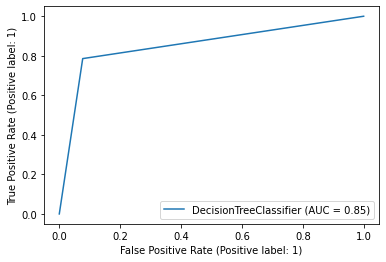

In [ ]:
y_pred = df.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy:{:2f}".format(acc))
acc = roc_auc_score(y_test,y_pred)
print("Test set auc:{:2f}".format(acc))
plot_roc_curve(df, X_test,y_test)



In [ ]:
acc = roc_auc_score(y_train, df.predict(X_train))
print("Train set AUC : ", acc)

Train set AUC :  0.995049504950495


**Making the Confusion Matrix**

In [ ]:
matrix = confusion_matrix(y_test,pred,labels = regressor.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[67  8]
 [11 34]]


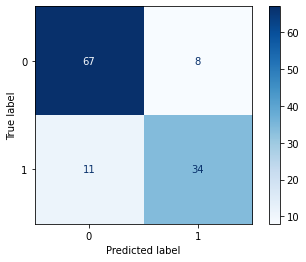

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=regressor.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

**Visualising the Training set results**

In [ ]:
from sklearn.model_selection import cross_val_score 

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  df = DecisionTreeClassifier(max_depth=depth) 
  
  df.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, df.predict(X_train))
  df = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(df, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8285714285714286  Cross val score :  0.8285714285714285
Depth  :  2  Training Accuracy :  0.9071428571428571  Cross val score :  0.9
Depth  :  3  Training Accuracy :  0.9071428571428571  Cross val score :  0.9
Depth  :  4  Training Accuracy :  0.925  Cross val score :  0.8714285714285716
Depth  :  5  Training Accuracy :  0.9357142857142857  Cross val score :  0.8785714285714284
Depth  :  6  Training Accuracy :  0.9464285714285714  Cross val score :  0.8642857142857142
Depth  :  7  Training Accuracy :  0.9642857142857143  Cross val score :  0.8571428571428571
Depth  :  8  Training Accuracy :  0.975  Cross val score :  0.8785714285714284
Depth  :  9  Training Accuracy :  0.9892857142857143  Cross val score :  0.875
Depth  :  10  Training Accuracy :  0.9892857142857143  Cross val score :  0.8714285714285713
Depth  :  20  Training Accuracy :  0.9964285714285714  Cross val score :  0.8607142857142858


[Text(0.5086206896551724, 0.9285714285714286, 'X[0] <= 0.45\ngini = 0.461\nsamples = 280\nvalue = [179, 101]'),
 Text(0.27586206896551724, 0.7857142857142857, 'X[1] <= 0.621\ngini = 0.283\nsamples = 199\nvalue = [165, 34]'),
 Text(0.13793103448275862, 0.6428571428571429, 'X[0] <= -0.132\ngini = 0.07\nsamples = 165\nvalue = [159, 6]'),
 Text(0.10344827586206896, 0.5, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.1724137931034483, 0.5, 'X[1] <= 0.41\ngini = 0.198\nsamples = 54\nvalue = [48, 6]'),
 Text(0.13793103448275862, 0.35714285714285715, 'X[0] <= -0.035\ngini = 0.142\nsamples = 52\nvalue = [48, 4]'),
 Text(0.06896551724137931, 0.21428571428571427, 'X[1] <= -0.117\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.034482758620689655, 0.07142857142857142, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.10344827586206896, 0.07142857142857142, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.20689655172413793, 0.21428571428571427, 'X[1] <= 0.018\ngini = 0.049\nsam

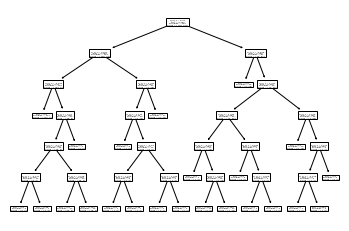

In [ ]:
from sklearn import tree
tree.plot_tree(dt)